In [ ]:
!pip install qiskit

In [ ]:
import qiskit
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
qiskit.IBMQ.save_account('ac05e244cf4e53e3842a230becc884bcd7395d0ebc42484e158085d7f8e6db097e404e65eea81c45dce182e8884414201434a248566c9ad7f30d8fb5629b4ceb')
qiskit.IBMQ.load_account()



# After loading credentials we query the backends
# qiskit.IBMQ.backend()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
# svism = Aer.get_backend('statevector_simulator')
# backend = 'simulator_statevetor'
# backend

ibmqfactory.load_account:WARNING:2021-07-18 04:17:27,116: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate, ZGate, IGate

from numpy import pi, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from qiskit import Aer
from qiskit.providers.aer import AerSimulator

backend = Aer.get_backend('qasm_simulator')

In [ ]:
from qiskit.test.mock import FakeRueschlikon, FakeTokyo
device_backend = FakeTokyo()
device_backend_2 = FakeRueschlikon()


In [ ]:
backend = AerSimulator.from_backend(device_backend)

In [ ]:
num_qubits = 4

qreg_q = QuantumRegister(num_qubits, 'q')
creg_c = ClassicalRegister(1, 'c')
  
def circuit_1():
    
  #Defining Registers for Suzuki-Trotter Simulation
  circuit = QuantumCircuit(qreg_q, creg_c)
  return circuit


In [ ]:
#Domain-Wall State preparation
def domain_wall_state(circuit, num_qubits):
    for i in range(int(num_qubits/2)):
        circuit.x(qreg_q[i])
    return circuit
#Neel-State Prepapration
def neel_state_preparation(circuit, num_qubits):
    for i in range(num_qubits):
        if i%2 == 0:
            circuit.x(qreg_q[i])
    return circuit

In [ ]:
#Magnetization operator
magnetization = Operator(ZGate())
print('magnetization operator:\n',magnetization.data)

#N_half operator
n_half = np.add(0.5*Operator(ZGate()).data,0.5*Operator(IGate()).data)
print('\nn_half operator:\n',n_half)

#spin-correlator operator


magnetization operator:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

n_half operator:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [ ]:
#XX-chain parameter U = 0 and h = 0 non-interacting molecule
def XX_chain_parameters():
    range_J = 10
    U = 0.0
    h = 0.0
    J = np.array([i for i in range(range_J)])
    return (J,U,h)
# print(XX_chain_parameters())
##Disordered XX-chain U=0 and h = [-h,h](randomly sampled from this set)
def XX_disorder_chain_parameters():
    range_J = 10
    U = 0.0
    # h = np.concatenate((np.random.random_sample((5,))-1,np.random.random_sample((5,))), axis = None)
    h= 2.
    J = np.array([i+1 for i in range(range_J)])
    return (J,U,h)
#XXZ-spin chain  case of Hisenberg model for quantum magnetism
# U != 0 , h = 0
def XXZ_spin_chain_parameters():
    range_J = 10
    range_U = 5
    h = 0.0
    J = np.array([i for i in range(range_J)])
    U = [0.,0.5,1.,1.5,2.0]
    return (J,U,h)
#XXZ- chain with linear potential U>=0, h = h*j
def XXZ_chain_potential_parameters(num_qubits,j):
    range_J = 10
    range_U = 5
    J = np.array([i for i in range(range_J)])
    U = [0.,0.2,0.4,0.6,0.8]
    h = 1.5
    
    h = h*(j+1)
    
    return (J,U,h)

In [ ]:
XXZ_spin_chain_parameters()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), [0.0, 0.5, 1.0, 1.5, 2.0], 0.0)

In [ ]:

def circuit_a_j(circuit,qubit_index, h, time):
    circuit.barrier()
    circuit.rz((h*time)/2,qreg_q[qubit_index])
    circuit.barrier()
    return circuit
def circuit_b_j(circuit, qubit_index, U, J, time ):
    #circuit for sigma_zz
    circuit.barrier()
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.rz((U*time)/2, qreg_q[qubit_index+1])
    circuit.cx(qreg_q[qubit_index],qreg_q[qubit_index+1])
    circuit.barrier()
    #circuit for sigma_yy
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.cu3((J*time)/2, -pi/2, pi/2, qreg_q[qubit_index+1], qreg_q[qubit_index] )
    circuit.x(qreg_q[qubit_index+1] )
    circuit.cu3((J*time)/2, pi/2, -pi/2, qreg_q[qubit_index+1], qreg_q[qubit_index])
    circuit.x(qreg_q[qubit_index+1] )
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1] )
    #circuit for sigma_xx
    circuit.barrier()
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.u3((-J*time)/2, -pi/2, pi/2, qreg_q[qubit_index])
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.barrier()
    return circuit
def circuit_c_j(circuit, qubit_index, U, J, time):
    #circuit for sigma_zz
    circuit.barrier()
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.rz((U*time), qreg_q[qubit_index+1])
    circuit.cx(qreg_q[qubit_index],qreg_q[qubit_index+1])
    circuit.barrier()
    #circuit for sigma_yy
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.cu3((J*time), -pi/2, pi/2, qreg_q[qubit_index+1], qreg_q[qubit_index] )
    circuit.x(qreg_q[qubit_index+1] )
    circuit.cu3((J*time), pi/2, -pi/2, qreg_q[qubit_index+1], qreg_q[qubit_index])
    circuit.x(qreg_q[qubit_index+1] )
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1] )
    #circuit for sigma_xx
    circuit.barrier()
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.u3((-J*time), -pi/2, pi/2, qreg_q[qubit_index])
    circuit.cx(qreg_q[qubit_index], qreg_q[qubit_index+1])
    circuit.barrier()
    return circuit

# circuit.draw('mpl')

In [ ]:
def circuit_for_magnetization(circuit, time, step, num_qubits):
    for j in range(step):
        for i in range(num_qubits):
            J,U,h = XX_chain_parameters()
            circuit_a_j(circuit, i, h, time)
            if i%2 == 0:
                circuit_c_j(circuit, i, U, J[1], time)
            elif i%2 != 0 and i != num_qubits - 1 :
                circuit_b_j(circuit, i, U, J[1], time)
            circuit_a_j(circuit, i, h, time)
    return circuit

In [ ]:
def circuit_for_n_half(circuit, time, step, num_qubits, chain):
    for j in range(step):
        if chain == 'xx-disordered':
            for i in range(num_qubits):
                J,U,h = XX_disorder_chain_parameters()
                circuit_a_j(circuit, i, h, time)
                if i%2 == 0:
                    circuit_c_j(circuit, i, U, J[1], time)
                elif i%2 != 0 and i != num_qubits - 1:
                    circuit_b_j(circuit, i, U, J[1], time)
                circuit_a_j(circuit, i, h, time)
        elif chain == 'xxz-spin-chain':
            for i in range(num_qubits):
                J,U,h = XXZ_spin_chain_parameters()
                circuit_a_j(circuit, i, h, time)
                if i%2 == 0:
                    circuit_c_j(circuit, i, U[2], J[1], time)
                elif i%2 != 0 and i != num_qubits - 1:
                    circuit_b_j(circuit, i, U[2], J[1], time)
                circuit_a_j(circuit, i, h, time)
        elif chain == 'xxz-chain-potential':
            for i in range(num_qubits):
                J,U,h = XXZ_chain_potential_parameters(num_qubits,i)
                circuit_a_j(circuit, i, h, time)
                if i%2 == 0:
                    circuit_c_j(circuit, i, U[4], J[1], time)
                elif i%2 != 0 and i != num_qubits - 1:
                    circuit_b_j(circuit, i, U[4], J[1], time)
                circuit_a_j(circuit, i, h, time)
    return circuit        
        

In [ ]:
def circuit_for_spin_correlator(circuit, time, step, num_qubits):
  for j in range(step):
        for i in range(num_qubits):
            J,U,h = XX_chain_parameters()
            circuit_a_j(circuit, i, h, time)
            if i%2 == 0:
                circuit_c_j(circuit, i, U, J[2], time)
            elif i%2 != 0 and i != num_qubits - 1 :
                circuit_b_j(circuit, i, U, J[2], time)
            circuit_a_j(circuit, i, h, time)
  return circuit

In [ ]:
# #driver programme for n_half 
# circuit = domain_wall_state(circuit, num_qubits)
# circuit = circuit_for_n_half(circuit, 1, 1, num_qubits, 'xxz-chain-potential')
# circuit.measure(qreg_q, creg_c)
# # circuit.measure(qreg_q[1:10], creg_c[1:10])
# circuit.draw('text', scale = 0.25, plot_barriers = False, fold = -1)

In [ ]:
# %tb
def circuit_generation(num_qubits, time, step, chain, q_index):
    
  
  # driver programme for magnetization
  circuit = domain_wall_state(circuit_1(), num_qubits)
  # circuit = neel_state_preparation(circuit_1(), num_qubits)
  circuit = circuit_for_magnetization(circuit, time, step, num_qubits)
  circuit.measure(qreg_q[q_index], creg_c[0])
  circuit.draw('text', scale = 0.25, plot_barriers = False, fold = -1)

  return circuit
circuit_generation(4, 0.5, 1, 'xxz-chain-potential', 0).draw('text', plot_barriers = False, fold = -1)

┌───┐ ┌───────┐                           ┌──────────────────┐     ┌──────────────────┐                ┌───────────────────┐       ┌───────┐                                                                                                                                                                                                                                                                                                          ┌─┐
q_0: ┤ X ├─┤ Rz(0) ├────■─────────────■─────■──┤ U3(0.5,-π/2,π/2) ├─────┤ U3(0.5,π/2,-π/2) ├───────■─────■──┤ U3(-0.5,-π/2,π/2) ├──■────┤ Rz(0) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤M├
     ├───┤ └───────┘  ┌─┴─┐┌───────┐┌─┴─┐ ┌─┴─┐└────────┬─────────┘┌───┐└────────┬─────────┘┌───┐┌─┴─┐ ┌─┴─┐└───────────────────┘┌─┴─┐  └───────┘  ┌───────┐                           ┌───────────────────┐     ┌───────────────────┐                ┌────────────────────┐       ┌───────┐                                                                                                                                                               └╥┘
q_1: ┤ X ├────────────┤ X ├┤ Rz(0) ├┤ X ├─┤ X ├─────────■──────────┤ X ├─────────■──────────┤ X ├┤ X ├─┤ X ├─────────────────────┤ X ├─────────────┤ Rz(0) ├────■─────────────■─────■──┤ U3(0.25,-π/2,π/2) ├─────┤ U3(0.25,π/2,-π/2) ├───────■─────■──┤ U3(-0.25,-π/2,π/2) ├──■────┤ Rz(0) ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫─
     └───┘            └───┘└───────┘└───┘ └───┘                    └───┘                    └───┘└───┘ └───┘                     └───┘             └───────┘  ┌─┴─┐┌───────┐┌─┴─┐ ┌─┴─┐└─────────┬─────────┘┌───┐└─────────┬─────────┘┌───┐┌─┴─┐ ┌─┴─┐└────────────────────┘┌─┴─┐  └───────┘  ┌───────┐                           ┌──────────────────┐     ┌──────────────────┐                ┌───────────────────┐       ┌───────┐                        ║ 
q_2: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├┤ Rz(0) ├┤ X ├─┤ X ├──────────■──────────┤ X ├──────────■──────────┤ X ├┤ X ├─┤ X ├──────────────────────┤ X ├─────────────┤ Rz(0) ├────■─────────────■─────■──┤ U3(0.5,-π/2,π/2) ├─────┤ U3(0.5,π/2,-π/2) ├───────■─────■──┤ U3(-0.5,-π/2,π/2) ├──■────┤ Rz(0) ├────────────────────────╫─
                                                                                                                                                              └───┘└───────┘└───┘ └───┘                     └───┘                     └───┘└───┘ └───┘                      └───┘             └───────┘  ┌─┴─┐┌───────┐┌─┴─┐ ┌─┴─┐└────────┬─────────┘┌───┐└────────┬─────────┘┌───┐┌─┴─┐ ┌─┴─┐└───────────────────┘┌─┴─┐  └───────┘  ┌───────┐  ┌───────┐  ║ 
q_3: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├┤ Rz(0) ├┤ X ├─┤ X ├─────────■──────────┤ X ├─────────■──────────┤ X ├┤ X ├─┤ X ├─────────────────────┤ X ├─────────────┤ Rz(0) ├──┤ Rz(0) ├──╫─
                                                                                                                                                                                                                                                                                                         └───┘└───────┘└───┘ └───┘                    └───┘                    └───┘└───┘ └───┘                     └───┘             └──────

In [ ]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                        and not x.configuration().simulator 
                                        and x.status().operational==True))

ibmqfactory.load_account:WARNING:2021-07-18 05:05:08,543: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from qiskit.tools.monitor import job_monitor


In [ ]:
def circuit_measurement(num_qubits, time, step, chain, q_index ):

  
  shots = 2048

  circuit = []
  # circuit_2 = []
  magnetization = []
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[0], q_index[1] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[0], q_index[2] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[0], q_index[3] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[1], q_index[2] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[1], q_index[3] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[2], q_index[3] ))
  

    
  # # Run our circuit
  t_qc = transpile(circuit, backend, optimization_level=3)
  qobj = assemble(t_qc, shots = shots)
  job = backend.run(qobj)

  job_monitor(job)
  result = job.result()
  for c in circuit:

    counts = result.get_counts(c)
    # counts_2 = result.get_counts(c_2)
    probs = {}
    for output in ['00','01', '10', '11']:
      if output in counts:
          probs[output] = counts[output]/shots
      else:
          probs[output] = 0

      # if output_2 in counts_2:
      #     probs_2[output_2] = counts_2[output_2]/shots
      # else:
      #     probs_2[output_2] = 0
      
    magnetization.append(probs['00'] - probs['01'] - probs['10'] + probs['11'])

  return magnetization

value = circuit_measurement(4, 0.25, 8,'', [0,1,2,3])
print(value)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.


Job Status: job has successfully run
[0.0458984375, 0.130859375, 0.1962890625, 0.1005859375, 0.1767578125, 0.087890625, 0.0625, 0.076171875, -0.07421875, -0.0341796875, -0.0556640625, -0.076171875, -0.076171875, -0.0458984375, -0.04296875, -0.064453125, -0.0107421875, -0.0185546875, -0.0126953125, -0.087890625, -0.1064453125, -0.1083984375, -0.02734375, -0.0625, -0.103515625, -0.0458984375, -0.10546875, -0.044921875, -0.033203125, -0.0263671875, -0.0400390625, -0.150390625, -0.0625, -0.0244140625, -0.0615234375, -0.16796875, -0.0419921875, -0.1455078125, -0.0517578125, -0.1796875, 0.298828125, 0.361328125, 0.3623046875, 0.2685546875, 0.43359375, 0.2900390625, 0.376953125, 0.3515625]


In [ ]:
temp = value
temp = np.array(temp)
temp_s1 = temp[0:8]
temp_s2 = temp[8:16]
temp_s3 = temp[16:24]
temp_s4 = temp[24:32]
temp_s5 = temp[32:40]
temp_s6 = temp[40:48]

print(temp_s1, temp_s2, temp_s3, temp_s4, temp_s5, temp_s6)
temp_total = np.sum([temp_s1, -temp_s2, -temp_s3, -temp_s4, -temp_s5, temp_s6, temp_s1, -temp_s4, temp_s6], axis = 0)
print(temp_total)

[0.04589844 0.13085938 0.19628906 0.10058594 0.17675781 0.08789062
 0.0625     0.07617188] [-0.07421875 -0.03417969 -0.05566406 -0.07617188 -0.07617188 -0.04589844
 -0.04296875 -0.06445312] [-0.01074219 -0.01855469 -0.01269531 -0.08789062 -0.10644531 -0.10839844
 -0.02734375 -0.0625    ] [-0.10351562 -0.04589844 -0.10546875 -0.04492188 -0.03320312 -0.02636719
 -0.04003906 -0.15039062] [-0.0625     -0.02441406 -0.06152344 -0.16796875 -0.04199219 -0.14550781
 -0.05175781 -0.1796875 ] [0.29882812 0.36132812 0.36230469 0.26855469 0.43359375 0.29003906
 0.37695312 0.3515625 ]
[1.04394531 1.15332031 1.45800781 1.16015625 1.51171875 1.10839844
 1.08105469 1.46289062]


In [ ]:
def circuit_measurement(num_qubits, time, step, chain, q_index ):

  
  shots = 2048

  circuit = []
  # circuit_2 = []
  magnetization = []
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[0] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[1] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[2] ))
  for i in range(step):
    circuit.append(circuit_generation(num_qubits, time, step, chain, q_index[3] ))

    
  # # Run our circuit
  t_qc = transpile(circuit, backend, optimization_level=3)
  qobj = assemble(t_qc, shots = shots)
  job = backend.run(qobj)

  job_monitor(job)
  result = job.result()
  for c in circuit:

    counts = result.get_counts(c)
    # counts_2 = result.get_counts(c_2)
    probs = {}
    # probs_2 = {}
    for output in ['0','1']:
      if output in counts:
          probs[output] = counts[output]/shots
      else:
          probs[output] = 0

      # if output_2 in counts_2:
      #     probs_2[output_2] = counts_2[output_2]/shots
      # else:
      #     probs_2[output_2] = 0
      
    magnetization.append(probs['0'] - probs['1'])

  return magnetization
mag = circuit_measurement(4, 0.25, 8, 'xxz-spin-chain', [0,1,2,3])

print(mag)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.


Job Status: job has successfully run
[-0.076171875, -0.146484375, -0.1171875, 0.0380859375, 0.017578125, 0.0166015625, 0.0361328125, 0.005859375, -0.0625, -0.212890625, -0.12890625, -0.2939453125, -0.26171875, -0.31640625, -0.3017578125, -0.30859375, 0.34375, 0.328125, 0.1865234375, 0.3408203125, 0.1875, 0.2236328125, 0.3291015625, 0.3291015625, 0.3818359375, 0.408203125, 0.4814453125, 0.443359375, 0.62109375, 0.416015625, 0.44140625, 0.5947265625]


In [ ]:
result = mag
result = np.array(result)
temp_1 = result[0:8]
temp_2 = result[8:16]
temp_3 = result[16:24]
temp_4 = result[24:32]
print(temp_1, temp_2, temp_3, temp_4)
temp_add = np.sum([temp_1, temp_2, -temp_3, -temp_4], axis = 0)
print(temp_add)

[-0.07617188 -0.14648438 -0.1171875   0.03808594  0.01757812  0.01660156
  0.03613281  0.00585938] [-0.0625     -0.21289062 -0.12890625 -0.29394531 -0.26171875 -0.31640625
 -0.30175781 -0.30859375] [0.34375    0.328125   0.18652344 0.34082031 0.1875     0.22363281
 0.32910156 0.32910156] [0.38183594 0.40820312 0.48144531 0.44335938 0.62109375 0.41601562
 0.44140625 0.59472656]
[-0.86425781 -1.09570312 -0.9140625  -1.04003906 -1.05273438 -0.93945312
 -1.03613281 -1.2265625 ]


In [ ]:
temp_final = np.divide((temp_total - np.power(temp_add, 2)), 4)
print(temp_final)

[ 0.07425094 -0.01181126  0.15562439  0.01961875  0.10086727  0.05645657
  0.00187087 -0.01039124]


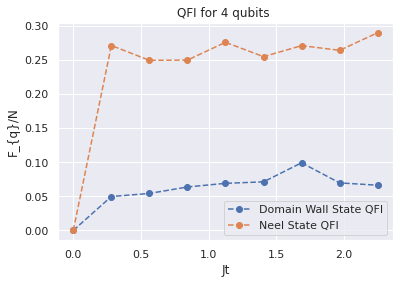

In [ ]:
x = np.linspace(0, 2.25, num=9)
y = [0., 0.04967856, 0.05419898, 0.06365585, 0.06899428, 0.07117367, 0.09909797,
 0.0696373,  0.06624985 ]
y1 = [0., 0.27096462, 0.24926758, 0.24961853, 0.27561951, 0.25461483, 0.27078915,
 0.26388717, 0.2896688 ]
plt.plot(x, y, label = 'Domain Wall State QFI', linestyle = 'dashed', marker = 'o')
plt.plot(x, y1, label = 'Neel State QFI', linestyle = 'dashed', marker = 'o')
# naming the x axis
plt.xlabel('Jt')
# naming the y axis
plt.ylabel('F_{q}/N')
# giving a title to my graph
plt.title('QFI for 4 qubits ')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

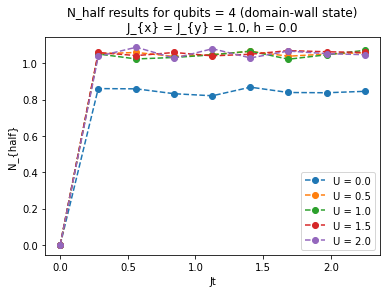

In [ ]:
x = np.linspace(0, 2.25, num = 9)
y1 = np.array([0., 0.86035156, 0.85888672, 0.83203125, 0.82080078, 0.86816406, 0.83886719,
 0.83740234, 0.84521484])
y2 = np.array([0., 1.05224609, 1.05908203, 1.03710938, 1.04736328, 1.06542969, 1.03857422,
 1.05029297, 1.05810547])
y3 = np.array([0., 1.05078125, 1.0234375,  1.03173828, 1.04589844, 1.06640625, 1.02197266,
 1.04638672, 1.07080078])
y4 = np.array([0., 1.05908203, 1.04199219, 1.05908203, 1.04052734, 1.04931641, 1.06933594,
 1.06298828, 1.05908203])
y5 = np.array([0., 1.03808594, 1.08789062, 1.02734375, 1.07958984, 1.02929688, 1.06689453,
 1.05273438, 1.046875])

plt.plot(x, y1, label = 'U = 0.0', linestyle = 'dashed', marker = 'o')
plt.plot(x, y2, label = "U = 0.5", linestyle = 'dashed', marker = 'o')
plt.plot(x, y3, label = 'U = 1.0', linestyle = 'dashed', marker = 'o')
plt.plot(x, y4, label = 'U = 1.5', linestyle = 'dashed', marker = 'o')
plt.plot(x, y5, label = 'U = 2.0', linestyle = 'dashed', marker = 'o')

# naming the x axis
plt.xlabel('Jt')
# naming the y axis
plt.ylabel('N_{half}')
# giving a title to my graph
plt.title('N_half results for qubits = 4 (domain-wall state)\n J_{x} = J_{y} = 1.0, h = 0.0 ')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

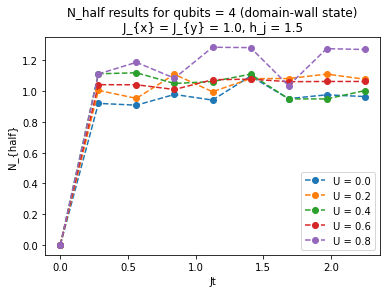

In [ ]:
x = np.linspace(0, 2.25, num = 9)
y1 = np.array([0., 0.92089844, 0.90917969, 0.97900391, 0.94238281, 1.09814453, 0.95166016,
 0.9765625,  0.96533203 ])
y2 = np.array([0., 1.00537109, 0.95361328, 1.10986328, 0.99658203, 1.08203125, 1.08251953,
 1.11132812, 1.078125   ])
y3 = np.array([0., 1.11328125, 1.12011719, 1.05029297, 1.06298828, 1.11083984, 0.95019531,
 0.94970703, 1.00390625 ])
y4 = np.array([0., 1.04248047, 1.04199219, 1.01123047, 1.07470703, 1.07861328, 1.06201172,
 1.06347656, 1.06347656 ])
y5 = np.array([0., 1.11230469, 1.18798828, 1.08447266, 1.28613281, 1.28369141, 1.03613281,
 1.27685547, 1.27148438 ])

plt.plot(x, y1, label = 'U = 0.0', linestyle = 'dashed', marker = 'o')
plt.plot(x, y2, label = "U = 0.2", linestyle = 'dashed', marker = 'o')
plt.plot(x, y3, label = 'U = 0.4', linestyle = 'dashed', marker = 'o')
plt.plot(x, y4, label = 'U = 0.6', linestyle = 'dashed', marker = 'o')
plt.plot(x, y5, label = 'U = 0.8', linestyle = 'dashed', marker = 'o')

# naming the x axis
plt.xlabel('Jt')
# naming the y axis
plt.ylabel('N_{half}')
# giving a title to my graph
plt.title('N_half results for qubits = 4 (domain-wall state)\n J_{x} = J_{y} = 1.0, h_j = 1.5 ')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

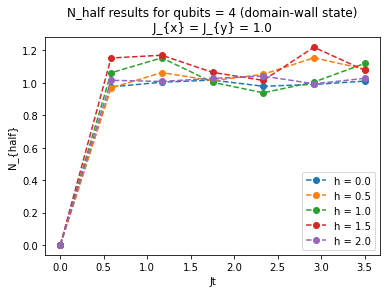

In [ ]:
x = np.linspace(0, 3.5, num = 7)
y1 = np.array([0., 0.97509766, 1.00390625, 1.01708984, 0.97900391, 0.99023438, 1.01074219])
y2 = np.array([0., 0.96826172, 1.06347656, 1.01367188, 1.05273438, 1.15478516, 1.08447266])
y3 = np.array([0., 1.06201172, 1.15429688, 1.00390625, 0.93847656, 1.00488281, 1.11962891])
y4 = np.array([0., 1.15332031, 1.17041016, 1.06494141, 1.01513672, 1.21972656, 1.07714844])
y5 = np.array([0., 1.015625,   1.00878906, 1.02734375, 1.04150391, 0.99414062, 1.02783203])

plt.plot(x, y1, label = 'h = 0.0', linestyle = 'dashed', marker = 'o')
plt.plot(x, y2, label = "h = 0.5", linestyle = 'dashed', marker = 'o')
plt.plot(x, y3, label = 'h = 1.0', linestyle = 'dashed', marker = 'o')
plt.plot(x, y4, label = 'h = 1.5', linestyle = 'dashed', marker = 'o')
plt.plot(x, y5, label = 'h = 2.0', linestyle = 'dashed', marker = 'o')

# naming the x axis
plt.xlabel('Jt')
# naming the y axis
plt.ylabel('N_{half}')
# giving a title to my graph
plt.title('N_half results for qubits = 4 (domain-wall state)\n J_{x} = J_{y} = 1.0 ')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()


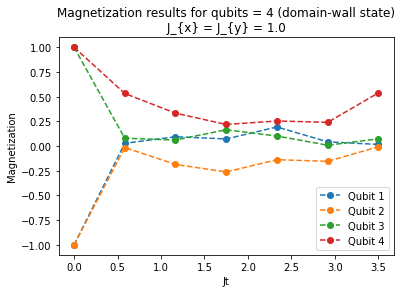

In [ ]:
x = np.linspace(0, 3.5, num = 7)
y1 = np.array([-1., 0.02832031, 0.09472656, 0.07226562, 0.19335938, 0.04296875, 0.01660156 ])
y2 = np.array([-1., -0.01464844, -0.18554688, -0.26171875, -0.13769531, -0.15429688, -0.00683594])
y3 = np.array([1., 0.07910156, 0.06152344, 0.16503906, 0.1015625,  0.00878906, 0.07324219])
y4 = np.array([1., 0.53222656, 0.33300781, 0.21875,    0.25390625, 0.24023438, 0.53808594])

plt.plot(x, y1, label = 'Qubit 1', linestyle = 'dashed', marker = 'o')
plt.plot(x, y2, label = "Qubit 2", linestyle = 'dashed', marker = 'o')
plt.plot(x, y3, label = 'Qubit 3', linestyle = 'dashed', marker = 'o')
plt.plot(x, y4, label = 'Qubit 4', linestyle = 'dashed', marker = 'o')
  
# naming the x axis
plt.xlabel('Jt')
# naming the y axis
plt.ylabel('Magnetization')
# giving a title to my graph
plt.title('Magnetization results for qubits = 4 (domain-wall state)\n J_{x} = J_{y} = 1.0 ')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

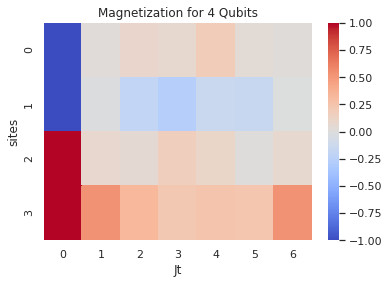

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_theme()

y1 = np.array([-1., 0.02832031, 0.09472656, 0.07226562, 0.19335938, 0.04296875, 0.01660156 ])
y2 = np.array([-1., -0.01464844, -0.18554688, -0.26171875, -0.13769531, -0.15429688, -0.00683594])
y3 = np.array([1., 0.07910156, 0.06152344, 0.16503906, 0.1015625,  0.00878906, 0.07324219])
y4 = np.array([1., 0.53222656, 0.33300781, 0.21875,    0.25390625, 0.24023438, 0.53808594])
data_set = np.array([y1,y2, y3, y4])
ax = sns.heatmap(data_set  , cmap = 'coolwarm', vmin = -1.0, vmax = 1.0 )

ax.set_xlabel("Jt")
ax.set_ylabel('sites')
  
plt.title( "Magnetization for 4 Qubits" )
plt.show()